# Real-world Data Wrangling

## Data No 1: 120 years of Olympic history: athletes and results
## Data No 2: Climate Change

### 1. Gather data

#### Data No 1:
120 years of olympic history is downloaded using kaggle api. This involves installing pip kaggle. Secondly, generating kaggle token. Then, we copied the dataset api and we download data using kaggle api. Lastly, we unzip this data by importing zipfile and then we assess data using pandas.

#### Data No 2:
Climate change dataset is downloaded manually from kaggle and start using with pandas.

# **Dataset 1:**
### Gathering data by accessing kaggle API.


In [1]:
#Importing all useful directories for this project:

import pandas as pd
import numpy as np
import zipfile
import pycountry
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
# Installing kaggle
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: kaggle.json: No such file or directory


In [4]:
#Downloading dataset kaggle api
!kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results

120-years-of-olympic-history-athletes-and-results.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
dataset = '/Users/bilal/Downloads/Project/120-years-of-olympic-history-athletes-and-results.zip'

In [6]:
# Extracting the files from the downloaded zipfile
with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
df_olympic = pd.read_csv('athlete_events.csv')
df_olympic.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Dataset 2
### Download data manually from kaggle.

In [8]:
data_environment = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv',encoding='latin-1')
data_environment.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


# Environment Data

## 2. Assess data

### Quality Issue 1:

In [9]:
data_environment['Y1961'].sample(15)

4626   -0.575
4216    0.040
142     2.486
4268    1.467
6249    0.279
5379    0.458
5010    0.634
3117    2.212
1247    0.442
4093      NaN
4806    0.153
3562    0.086
9548   -0.051
4322      NaN
9175    0.645
Name: Y1961, dtype: float64

#### Missing Data:<br> 
As we can see from the temperature tables there are a few missing values which need to be addressed before moving to the analysis part. We can see how many missing values in all Years columns by combining them in one column which we do in the data cleaning part.

### Quality Issue 2:

In [10]:
data_environment.head(5)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


#### Irrelevent Data:
Environment data have too many irrelevent columns which will not be used in our analysis so we will remove all these columns to make it ready for our final analysis.

### Tidiness Issue 1:

In [11]:
data_environment.info()
data_environment.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000



#### Single observation stored in multiple tables <br>
At first glance of data, we can observe that year entry is stored in multiple columns in environment data, which can be considered as a tidiness issue because it is a single observation stored in multiple columns. we will add all years into one entry once we clean this data.

### Tidiness Issue 2: 

In [12]:
data_environment_duplicate = data_environment[data_environment.duplicated()]
print(data_environment_duplicate)

Empty DataFrame
Columns: [Area Code, Area, Months Code, Months, Element Code, Element, Unit, Y1961, Y1962, Y1963, Y1964, Y1965, Y1966, Y1967, Y1968, Y1969, Y1970, Y1971, Y1972, Y1973, Y1974, Y1975, Y1976, Y1977, Y1978, Y1979, Y1980, Y1981, Y1982, Y1983, Y1984, Y1985, Y1986, Y1987, Y1988, Y1989, Y1990, Y1991, Y1992, Y1993, Y1994, Y1995, Y1996, Y1997, Y1998, Y1999, Y2000, Y2001, Y2002, Y2003, Y2004, Y2005, Y2006, Y2007, Y2008, Y2009, Y2010, Y2011, Y2012, Y2013, Y2014, Y2015, Y2016, Y2017, Y2018, Y2019]
Index: []

[0 rows x 66 columns]


#### Multiple variables are stored in one column.<br>
As we can see from the environmental data, In the element table there are two value stored temperature and standard deviation which is not the best approach as it stores two different values. In the data cleaning process, we will remove this many other tables from the data as they do not help in any statistical analysis.

## 3. Clean data

In the Environment dataset I have merge mapping dataset from kaggle.
1. Data columns renaming.<br>
   I have changed Column Area to Country as it is easier to understand rather than Area.
2. Rows value changed.<br>
   I changed season names in the months' category as:'Dec\x96Jan\x96Feb' → 'Winter', 'Mar\x96Apr\x96May' → 'Spring', 'Jun\x96Jul\x96Aug' → 'Summer','Sep\x96Oct\x96Nov'→'Fall'. Because year was written like 'Y1961', I split 'Y' and used the other part of 'year'.
3. Deleting columns and rows.<br>
   I have deleted 'Area Code', 'Month Code', 'Element Code', 'Element Unit' and 'Unit Columns as I do not need        these values in my analysis. I have also removed the 'Standart Deviation' rows from the temprature column as it    is also not required. 
4. Merging Years Column.<br>
   I have merged all year columns into one column Called 'Year' as it easy to do analysis this way.
5. Merging Years Column.<br>
   The temperature change column has many missing values which are replaced by a mean value of the Temperature column. 


In [13]:
#Removing Standerd deviation rows from Element Column.
data_environment.drop(data_environment[data_environment['Element'] == 'Standard Deviation'].index, inplace = True)
data_environment.head

<bound method NDFrame.head of       Area Code         Area  Months Code               Months  Element Code  \
0             2  Afghanistan         7001              January          7271   
2             2  Afghanistan         7002             February          7271   
4             2  Afghanistan         7003                March          7271   
6             2  Afghanistan         7004                April          7271   
8             2  Afghanistan         7005                  May          7271   
...         ...          ...          ...                  ...           ...   
9646       5873         OECD         7016          DecJanFeb          7271   
9648       5873         OECD         7017          MarAprMay          7271   
9650       5873         OECD         7018          JunJulAug          7271   
9652       5873         OECD         7019          SepOctNov          7271   
9654       5873         OECD         7020  Meteorological year          7271   

         

In [14]:
# Merging all years columns to Year column.
data_e_merge = pd.melt(frame = data_environment, id_vars = ['Area Code','Area','Months Code','Months','Element Code','Element','Unit'], var_name = 'Year', value_name= 'Temperature change')
data_e_merge.sample(10)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature change
134851,5305,Western Asia,7008,August,7271,Temperature change,°C,Y1988,0.350
247841,89,Guatemala,7019,SepOctNov,7271,Temperature change,°C,Y2012,0.084
238248,93,Haiti,7011,November,7271,Temperature change,°C,Y2010,0.330
122670,114,Kenya,7019,SepOctNov,7271,Temperature change,°C,Y1986,0.420
185407,108,Kazakhstan,7006,June,7271,Temperature change,°C,Y1999,-1.031
221237,240,United States Virgin Islands,7020,Meteorological year,7271,Temperature change,°C,Y2006,0.505
96130,5207,South America,7016,DecJanFeb,7271,Temperature change,°C,Y1980,0.248
121820,55,Dominica,7019,SepOctNov,7271,Temperature change,°C,Y1986,-0.088
209465,105,Israel,7009,September,7271,Temperature change,°C,Y2004,0.699
86340,5102,Middle Africa,7018,JunJulAug,7271,Temperature change,°C,Y1978,-0.021


In [15]:
#Adding mapping dataset for countries ISO 3 Code.
mapping_country = pd.read_csv('continents2.csv')

In [16]:
mapping_country.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [17]:
# Dropping irrelevant columns
mapping_country.drop('alpha-2', inplace=True, axis=1)
# Remove all columns between column name 'country-code' to 'iso_3166-2' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'country-code':'iso_3166-2'].columns, axis=1)
# Remove all columns between column name 'intermediate-region' to 'intermediate-region-code' 
mapping_country = mapping_country.drop(mapping_country.loc[:, 'intermediate-region':'intermediate-region-code'].columns, axis=1)

mapping_country.head()

,name,alpha-3,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [18]:
mapping_country.drop('sub-region', inplace=True, axis=1)
mapping_country.head()

,name,alpha-3,region
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania


In [19]:
mapping_country = mapping_country.rename({'name':'Area','alpha-3':'Country Code'}, axis =1)
mapping_country.head()

,Area,Country Code,region
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania


In [20]:
#Merging mapping dataset with main data environment
df_region = data_e_merge.merge(mapping_country, on='Area', how='inner')
df_region

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Year,Temperature change,Country Code,region
0,2,Afghanistan,7001,January,7271,Temperature change,°C,Y1961,0.777,AFG,Asia
1,2,Afghanistan,7002,February,7271,Temperature change,°C,Y1961,-1.743,AFG,Asia
2,2,Afghanistan,7003,March,7271,Temperature change,°C,Y1961,0.516,AFG,Asia
3,2,Afghanistan,7004,April,7271,Temperature change,°C,Y1961,-1.709,AFG,Asia
4,2,Afghanistan,7005,May,7271,Temperature change,°C,Y1961,1.412,AFG,Asia
...,...,...,...,...,...,...,...,...,...,...,...
206613,181,Zimbabwe,7016,DecJanFeb,7271,Temperature change,°C,Y2019,0.760,ZWE,Africa
206614,181,Zimbabwe,7017,MarAprMay,7271,Temperature change,°C,Y2019,1.119,ZWE,Africa
206615,181,Zimbabwe,7018,JunJulAug,7271,Temperature change,°C,Y2019,1.245,ZWE,Africa
206616,181,Zimbabwe,7019,SepOctNov,7271,Temperature change,°C,Y2019,1.505,ZWE,Africa


In [21]:
#Removing all irrelevent columns which will not be used in analysis
df_region.drop('Area Code', inplace=True, axis=1)

In [22]:
df_region = df_region.drop(df_region.loc[:, 'Element Code':'Unit'].columns, axis=1)

In [23]:
df_region.drop('Months Code', inplace=True, axis=1)

In [24]:
#Changing seasons names in the months' category 
#as:{'Dec\x96Jan\x96Feb' → 'Winter', 
#'    Mar\x96Apr\x96May' → 'Spring', 
#'    Jun\x96Jul\x96Aug' → 'Summer',
#'    Sep\x96Oct\x96Nov'→'Fall'}

df_region['Months'].replace({'Dec\x96Jan\x96Feb': 'Winter', 'Mar\x96Apr\x96May': 'Spring', 'Jun\x96Jul\x96Aug': 'Summer', 'Sep\x96Oct\x96Nov': 'Fall'}, inplace=True)

In [25]:
#Removing y from Year column entries.
df_region['Year'] = df_region['Year'].str[1:]

In [26]:
#Renaming Area column to Country 
df_region = df_region.rename(columns={'Area': 'Country'})

In [27]:
#Reordering the Environment data according to desired values.
df_environment_clean = df_region.reindex(columns=['Country Code', 'Country', 'region','Months', 'Year', 'Temperature change'])

In [28]:
# Changing region name to Region for data consistency.
df_environment_clean.rename(columns={'region': 'Region'},inplace=True)

Text(0.5, 1.0, 'Age Distribution')

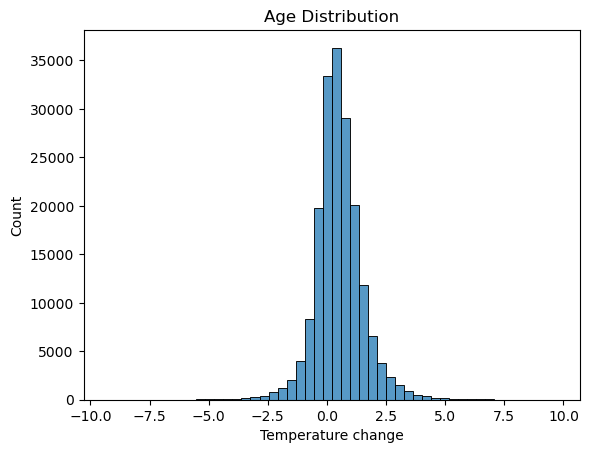

In [29]:
age  = sns.histplot(data=df_environment_clean, x='Temperature change', bins=50)
age.set_title('Age Distribution')

In [30]:
#Replacing NAN values to means values
mean_age_e = df_environment_clean['Temperature change'][df_environment_clean['Temperature change'] != 0].mean()
mean_age_e = mean_age_e.round(3)
df_environment_clean['Temperature change'] = df_environment_clean['Temperature change'].fillna(mean_age_e)

In [31]:
df_environment_clean.sample(10)

,Country Code,Country,Region,Months,Year,Temperature change
202665,ESH,Western Sahara,Africa,September,1964,0.788
30808,CPV,Cabo Verde,Africa,May,2003,1.524
89873,IRL,Ireland,Europe,December,1996,-1.140
55904,SLV,El Salvador,Americas,September,2004,0.898
62244,FRO,Faroe Islands,Europe,August,1964,-1.292
95897,JOR,Jordan,Asia,January,1997,0.969
47036,HRV,Croatia,Europe,Summer,2013,2.040
107623,LTU,Lithuania,Europe,Spring,1978,0.490
154915,ROU,Romania,Europe,December,1987,-0.116
98114,KEN,Kenya,Africa,August,2009,1.717


## 4. Update your data store


In [32]:
df_environment_clean.to_csv('df_environment_clean.csv', index=False)

## 5. Answer the research question

### 1. What are the ten most affected countries from temperature change mostly in the last ten years?


In [33]:
temp_change =df_environment_clean
temp_change.set_index("Year", inplace=True)
temp_change = temp_change.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
temp_change.reset_index(inplace = True)
temp_change = temp_change.groupby(['Country',]).agg({'Temperature change':'mean'})
temp_change = temp_change.sort_values('Temperature change',ascending=True).head(10)
temp_change.reset_index(inplace = True)
temp_change

,Country,Temperature change
0,South Georgia and the South Sandwich Islands,0.164529
1,Marshall Islands,0.327706
2,Chile,0.434506
3,Micronesia (Federated States of),0.487406
4,Falkland Islands (Malvinas),0.490000
5,Singapore,0.490000
6,Niue,0.490000
7,Nauru,0.490000
8,Yemen,0.490000
9,Tokelau,0.505329


### 1. What are the ten Least affected countries from temperature change mostly in the last ten years?

In [34]:
least_change =df_environment_clean
least_change.set_index("Year", inplace=True)
least_change = least_change.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
least_change.reset_index(inplace = True)
least_change = least_change.groupby(['Country',]).agg({'Temperature change':'mean'})
least_change = least_change.sort_values('Temperature change',ascending=False).head(10)
least_change.reset_index(inplace = True)
least_change

KeyError: "None of ['Year'] are in the columns"

# Environment Data

## 2. Assess data

### Quality Issue 1:

In [ ]:
df_olympic.describe()
df_olympic.info()

#### Data Completeness: <br>
Olympic data has missing data problems specifically in the columns age, height and weight.<br>
The Medal folder also has a huge chunk of missing value but that is understandable because when athletes don't win any medal they intentionally make it blank. 

### Quality Issue 2:

In [ ]:
df_olympic_duplicate = df_olympic[df_olympic.duplicated()]

In [ ]:
print(df_olympic_duplicate)

#### Data Completeness: <br>
Olympic data has 271116 unique values and we can see that there are 1385 duplicated values which should be removed before analysis as it will affect our analysis.

## 3. Clean data


### Olympic Data Cleaning: 
1. Drop duplicate
    - before removing duplicates 271116 and we removed 1385 duplicate rows and now we have 269731 rows
2. Removing non useful columns
3. replacing non zero "Age" values to mean values of age
4. Replacing NAN values in medal with No medal.

In [ ]:
# Droping duplicates:
df_olympic_clean = df_olympic.drop_duplicates()
df_olympic_clean.info()

In [ ]:
# removing non useful columns
df_olympic_clean = df_olympic_clean.drop(columns = ["Height","Weight","NOC"], axis=1)
df_olympic_clean.head()


In [ ]:
age  = sns.histplot(data=df_olympic_clean, x='Age', bins=50)
age.set_title('Age Distribution')

In [ ]:
mean_age = df_olympic_clean['Age'][df_olympic_clean['Age'] != 0].mean()
df_olympic_clean['Age'] = df_olympic_clean['Age'].replace(0, mean_age)


In [ ]:
df_olympic_clean['Age'].isnull().sum()
df_olympic_clean['Age'].info()

In [ ]:
df_olympic_clean['Medal'] = df_olympic_clean['Medal'].fillna('No Medal')
df_olympic_clean['Medal'].sample(10)

## 4. Update your data store

In [ ]:
#df_olympic_clean.to_csv('df_olympic_clean.csv', index=False)

## 5. Answer the research question

### Question:
### 1. Athlete with most gold medals in history?

In [ ]:
gold_medals = df_olympic_clean[df_olympic_clean['Medal'] == 'Gold']
gold_medals_counts = gold_medals['Name'].value_counts()

In [ ]:
top_medals = gold_medals_counts.head(5).sort_values(ascending=True)
print(top_medals)

ax = top_medals.plot(kind = 'barh', edgecolor = 'black', rot = 0, figsize = [14,6])
ax.bar_label(ax.containers[0], fontsize = 20)

plt.xlabel('Medal Count')
plt.show()

### 2. Get the top 5 medal-winning nations from the Olympics?

In [ ]:
countries_medal = df_olympic_clean.query('Medal != "No Medal"').groupby('Team').size().sort_values(ascending= False).iloc[:5]

In [ ]:
ax = countries_medal.plot(kind = 'bar', edgecolor = 'black', rot = 0, figsize = [14,6])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.xlabel('Medal Count')
plt.show()

### 3. How many gold, silver, and bronze medals did each nation win in total?

In [ ]:
all_medals = (df_olympic_clean.query('Medal != "No Medal"').groupby('Team').filter(lambda grp: len(grp)>1000)
                                              .groupby(['Team', 'Medal']).size().sort_values(ascending= False)
                                              .unstack())

In [ ]:
all_medals

### 4. Which gender took part in the Olympic games the most?? 

In [ ]:
gender_perticipation = df_olympic_clean.groupby('Sex').size()

In [ ]:
ax = gender_perticipation.plot(kind = 'bar', edgecolor = 'black', rot = 0, figsize = [8,6])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.xlabel('Gender Count in all olympics')
plt.show()

### 4. What is the Total Number of Participants Over the Year?

In [ ]:
#gender_perticipation = df_olympic_clean.groupby('Sex').size()
df_olympic_clean.groupby(['Year','Season','Sex'])['Year'].value_counts().unstack('Sex').reset_index().sort_values('Year')

### **5.2:** Reflection


First thing i will add is more visual diagrams for result after completing the next project.
Second i have to learn groupby completely in order to get more accurate results.
Hopefully this project complete the requirement desired by udacity kindly let me know what changes i can add in order to improve.